In [3]:
pip install citipy


     |████████████████████████████████| 563kB 1.2MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559703 sha256=3836d786320430a077d9ae1ad77915c6dcae339cac45dbdda7364bef439a7b4b
  Stored in directory: /Users/saurin/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
from api_keys import weather_api_key
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from scipy.stats import stats


In [2]:
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

618

In [4]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [5]:
record_count = 0
set_count = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_count < 50:
        record_count += 1
    else:
        set_count += 1
        record_count = 0

    print('Processing record {} of set {} | {}'.format(record_count, set_count, city))
    print(query_url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | okha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=okha
Processing record 2 of set 0 | otradnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=otradnoye
Processing record 3 of set 0 | nouakchott
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=nouakchott
Processing record 4 of set 0 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=dikson
Processing record 5 of set 0 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=aklavik
Processing record 6 of set 0 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=vaini
Processing record 7 of set 

Processing record 4 of set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=barrow
Processing record 5 of set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=kapaa
Processing record 6 of set 1 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=cherskiy
Processing record 7 of set 1 | espera feliz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=espera feliz
Processing record 8 of set 1 | kargasok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=kargasok
Processing record 9 of set 1 | ruwi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=ruwi
Processing record 10 of set 1 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?unit

Processing record 6 of set 2 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=fort nelson
Processing record 7 of set 2 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=georgetown
Processing record 8 of set 2 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=yellowknife
Processing record 9 of set 2 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=hilo
Processing record 10 of set 2 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=mataura
Processing record 11 of set 2 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=lagoa
Processing record 12 of set 2 | samfya
http://api.openweathermap.org/data/2.5/weather?

Processing record 9 of set 3 | necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=necochea
Processing record 10 of set 3 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=geraldton
Processing record 11 of set 3 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=vila franca do campo
Processing record 12 of set 3 | coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=coahuayana
Processing record 13 of set 3 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=victoria
Processing record 14 of set 3 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=sentyabrskiy
City not found!
Processing record 15 of set 3

Processing record 11 of set 4 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=airai
Processing record 12 of set 4 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=margate
Processing record 13 of set 4 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=kavaratti
Processing record 14 of set 4 | ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=ayan
Processing record 15 of set 4 | omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=omboue
Processing record 16 of set 4 | borovoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=borovoy
Processing record 17 of set 4 | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing record 14 of set 5 | shamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=shamary
Processing record 15 of set 5 | kyshtovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=kyshtovka
Processing record 16 of set 5 | baoshan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=baoshan
Processing record 17 of set 5 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=luderitz
Processing record 18 of set 5 | aguimes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=aguimes
Processing record 19 of set 5 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=derzhavinsk
Processing record 20 of set 5 | zhigansk
http://api.openweathermap.org/data/2.5/

Processing record 18 of set 6 | ilhabela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=ilhabela
Processing record 19 of set 6 | antalaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=antalaha
Processing record 20 of set 6 | kargopol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=kargopol
Processing record 21 of set 6 | boyolangu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=boyolangu
Processing record 22 of set 6 | ust-ordynskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=ust-ordynskiy
Processing record 23 of set 6 | sarakhs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=sarakhs
Processing record 24 of set 6 | tautira
http://api.openweathermap.org/da

Processing record 21 of set 7 | rungata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=rungata
City not found!
Processing record 22 of set 7 | dalvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=dalvik
Processing record 23 of set 7 | mingguang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=mingguang
Processing record 24 of set 7 | iguape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=iguape
Processing record 25 of set 7 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=hamilton
Processing record 26 of set 7 | nago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=nago
Processing record 27 of set 7 | meulaboh
http://api.openweathermap.org/data/2.5/we

Processing record 24 of set 8 | ndola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=ndola
Processing record 25 of set 8 | north branch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=north branch
Processing record 26 of set 8 | itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=itoman
Processing record 27 of set 8 | garwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=garwa
Processing record 28 of set 8 | poya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=poya
Processing record 29 of set 8 | lixourion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=lixourion
Processing record 30 of set 8 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing record 26 of set 9 | tolaga bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=tolaga bay
Processing record 27 of set 9 | ulladulla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=ulladulla
Processing record 28 of set 9 | priargunsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=priargunsk
Processing record 29 of set 9 | hanzhong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=hanzhong
Processing record 30 of set 9 | marsaxlokk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=marsaxlokk
Processing record 31 of set 9 | oussouye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=oussouye
Processing record 32 of set 9 | beroroha
http://api.openweathermap.o

Processing record 29 of set 10 | garissa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=garissa
Processing record 30 of set 10 | eirunepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=eirunepe
Processing record 31 of set 10 | carandai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=carandai
Processing record 32 of set 10 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=labuhan
Processing record 33 of set 10 | encruzilhada do sul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=encruzilhada do sul
Processing record 34 of set 10 | chabahar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=chabahar
Processing record 35 of set 10 | biak
http://api.openweath

Processing record 31 of set 11 | mao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=mao
Processing record 32 of set 11 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=saint-augustin
Processing record 33 of set 11 | preobrazheniye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=preobrazheniye
Processing record 34 of set 11 | hauterive
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=hauterive
Processing record 35 of set 11 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=kamenka
Processing record 36 of set 11 | wajima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80f11f6feb10847648355642a81128e&q=wajima
Processing record 37 of set 11 | borogontsy
http://api.openweather

In [6]:
weather_data = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data_df = pd.DataFrame(weather_data)
weather_data_df.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Temp          571
Lat           571
Lng           571
Wind Speed    571
dtype: int64

In [7]:
weather_data_df

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,okha,0,RU,1579796382,96,-11.38,53.57,142.95,6.42
1,otradnoye,73,RU,1579796382,67,32.00,59.78,30.82,8.95
2,nouakchott,100,MR,1579796304,9,93.20,18.09,-15.98,12.75
3,dikson,100,RU,1579796382,97,-12.12,73.51,80.55,14.43
4,aklavik,20,CA,1579796382,74,-22.00,68.22,-135.01,5.82
...,...,...,...,...,...,...,...,...,...
566,vestmannaeyjar,20,IS,1579796470,65,32.00,63.44,-20.27,34.45
567,lima,90,PE,1579796410,69,78.80,-12.04,-77.03,8.05
568,ukiah,90,US,1579796470,100,48.00,39.15,-123.21,2.10
569,ixtapa,90,MX,1579796470,78,77.00,20.70,-105.20,0.51


In [8]:
weather_data_df.to_csv("cities.csv")

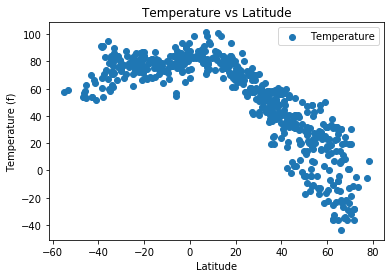

In [9]:
plt.scatter(x=weather_data_df['Lat'], y = weather_data_df['Temp'], label = 'Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (f)')
plt.legend(loc='best')
plt.title('Temperature vs Latitude')
plt.show()


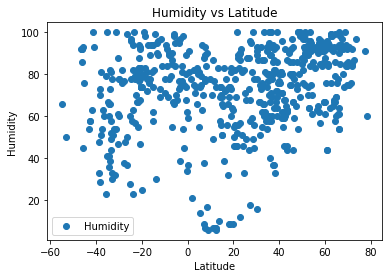

In [10]:
plt.scatter(x=weather_data_df['Lat'], y = weather_data_df['Humidity'], label = 'Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend(loc='best')
plt.title('Humidity vs Latitude')
plt.show()

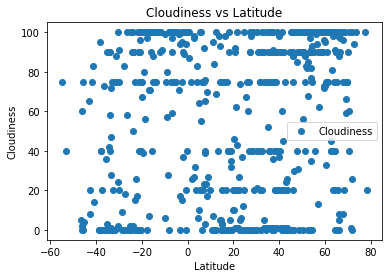

In [11]:
plt.scatter(x=weather_data_df['Lat'], y = weather_data_df['Cloudiness'], label = 'Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend(loc='best')
plt.title('Cloudiness vs Latitude')
plt.show()

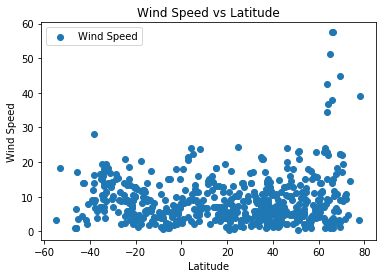

In [12]:
plt.scatter(x=weather_data_df['Lat'], y = weather_data_df['Wind Speed'], label='Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend(loc='best')
plt.title('Wind Speed vs Latitude')
plt.show()

In [13]:
northern_df = weather_data_df.loc[weather_data_df['Lat']>=0]
northern_df

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,okha,0,RU,1579796382,96,-11.38,53.57,142.95,6.42
1,otradnoye,73,RU,1579796382,67,32.00,59.78,30.82,8.95
2,nouakchott,100,MR,1579796304,9,93.20,18.09,-15.98,12.75
3,dikson,100,RU,1579796382,97,-12.12,73.51,80.55,14.43
4,aklavik,20,CA,1579796382,74,-22.00,68.22,-135.01,5.82
...,...,...,...,...,...,...,...,...,...
564,saint george,1,US,1579796296,93,39.99,37.10,-113.58,0.83
566,vestmannaeyjar,20,IS,1579796470,65,32.00,63.44,-20.27,34.45
568,ukiah,90,US,1579796470,100,48.00,39.15,-123.21,2.10
569,ixtapa,90,MX,1579796470,78,77.00,20.70,-105.20,0.51


In [14]:
southern_df = weather_data_df.loc[weather_data_df['Lat']<0]
southern_df

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
5,vaini,40,TO,1579796382,88,77.00,-21.20,-175.20,2.24
6,carnarvon,0,AU,1579796160,78,77.00,-24.87,113.63,20.80
10,busselton,0,AU,1579796384,49,61.00,-33.65,115.33,13.22
13,faanui,71,PF,1579796210,78,81.59,-16.48,-151.75,12.03
15,tuatapere,60,NZ,1579796385,92,54.00,-46.13,167.68,1.01
...,...,...,...,...,...,...,...,...,...
557,chokwe,90,MZ,1579796468,58,84.00,-24.53,32.98,8.86
560,nambucca heads,100,AU,1579796469,88,80.01,-30.65,153.00,12.75
561,palmeira das missoes,83,BR,1579796469,77,70.75,-27.90,-53.31,15.48
565,srandakan,100,ID,1579796470,89,76.87,-7.94,110.25,3.89


# Northern Hemisphere - Temperature vs. Latitude Linear Regression

Corelation coefficient : -0.8819358975406506


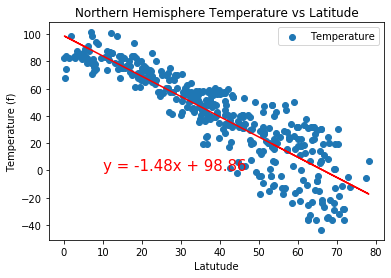

In [15]:
x = northern_df['Lat']
y = northern_df['Temp']
(slope, intercept, rvalues, pvalues, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, label='Temperature')
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (10,0), fontsize=15, color='red')
plt.xlabel('Latutude')
plt.ylabel('Temperature (f)')
plt.title('Northern Hemisphere Temperature vs Latitude')
plt.legend(loc='best')
print(f"Corelation coefficient : {rvalues}")


In Northern Hemisphere Temperature and lattitude has strong negative relationship, with increase in latitude temperature is decreasing, 

# Southern Hemisphere - Temperature vs. Latitude Linear Regression

Corelation coefficient : 0.43227025119689527


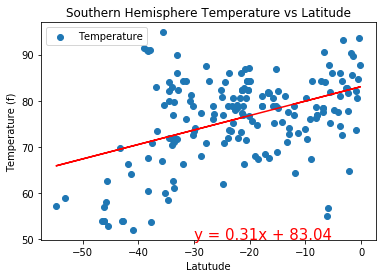

In [16]:
x = southern_df['Lat']
y = southern_df['Temp']
(slope, intercept, rvalues, pvalues, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, label='Temperature')
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (-30,50), fontsize=15, color='red')
plt.xlabel('Latutude')
plt.ylabel('Temperature (f)')
plt.title('Southern Hemisphere Temperature vs Latitude')
plt.legend(loc='best')
print(f"Corelation coefficient : {rvalues}")

In Southern Hemisphere Temperature and lattitude has some positive relationship, with r value is 0.43


# Northern Hemisphere - Humidity vs. Latitude Linear Regression

Corelation coefficient : 0.3845317167228742


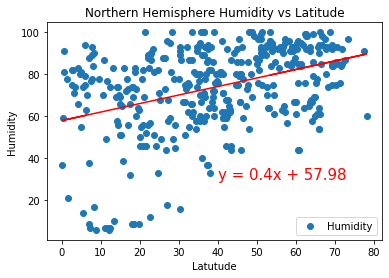

In [17]:
x = northern_df['Lat']
y = northern_df['Humidity']
(slope, intercept, rvalues, pvalues, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, label='Humidity')
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (40,30), fontsize=15, color='red')
plt.xlabel('Latutude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Humidity vs Latitude')
plt.legend(loc='best')
print(f"Corelation coefficient : {rvalues}")

In Northern Hemisphere there is some positive relationship between Humidity and Latitude with r value: 0.42

# Southern Hemisphere - Humidity vs. Latitude Linear Regression

Corelation coefficient : 0.28075488469394894


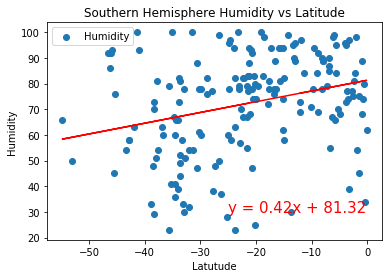

In [18]:
x = southern_df['Lat']
y = southern_df['Humidity']
(slope, intercept, rvalues, pvalues, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, label='Humidity')
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (-25,30), fontsize=15, color='red')
plt.xlabel('Latutude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Humidity vs Latitude')
plt.legend(loc='best')
print(f"Corelation coefficient : {rvalues}")

In Southern Hemisphere there is no relationship between Humidity and Latitude with r value: 0.26

# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression

Corelation coefficient : 0.2767700150894079


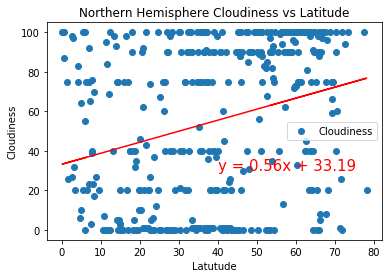

In [19]:
x = northern_df['Lat']
y = northern_df['Cloudiness']
(slope, intercept, rvalues, pvalues, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, label='Cloudiness')
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (40,30), fontsize=15, color='red')
plt.xlabel('Latutude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Cloudiness vs Latitude')
plt.legend(loc='best')
print(f"Corelation coefficient : {rvalues}")

In Northern Hemisphere there is no relationship between Cloudiness and Latitude with r value: 0.27

# Southern Hemisphere - Cloudiness vs. Latitude Linear Regression

Corelation coefficient : 0.42603558758005483


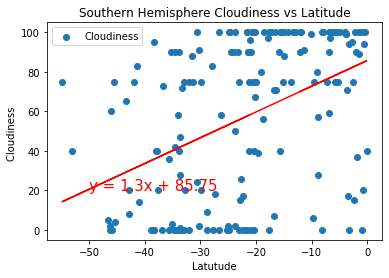

In [20]:
x = southern_df['Lat']
y = southern_df['Cloudiness']
(slope, intercept, rvalues, pvalues, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, label='Cloudiness')
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (-50,20), fontsize=15, color='red')
plt.xlabel('Latutude')
plt.ylabel('Cloudiness ')
plt.title('Southern Hemisphere Cloudiness vs Latitude')
plt.legend(loc='best')
print(f"Corelation coefficient : {rvalues}")

In Southern Hemisphere there is no relationship between Cloudiness and Latitude with r value: 0.33

# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

Corelation coefficient : 0.1574566985042185


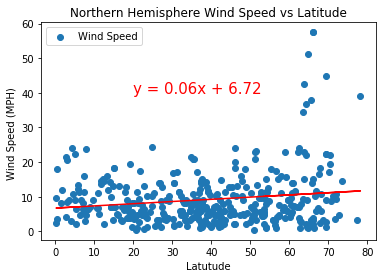

In [21]:
x = northern_df['Lat']
y = northern_df['Wind Speed']
(slope, intercept, rvalues, pvalues, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, label='Wind Speed')
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (20,40), fontsize=15, color='red')
plt.xlabel('Latutude')
plt.ylabel('Wind Speed (MPH) ')
plt.title('Northern Hemisphere Wind Speed vs Latitude')
plt.legend(loc='best')
print(f"Corelation coefficient : {rvalues}")

In Northern Hemisphere there is no relationship between Wind Speed and Latitude with r value: 0.19

# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression

Corelation coefficient : -0.28342678847359204


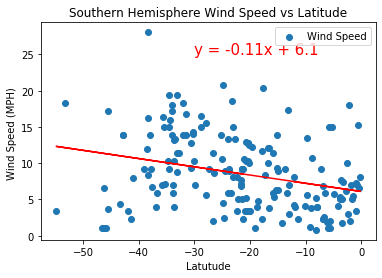

In [22]:
x = southern_df['Lat']
y = southern_df['Wind Speed']
(slope, intercept, rvalues, pvalues, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, label='Wind Speed')
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (-30,25), fontsize=15, color='red')
plt.xlabel('Latutude')
plt.ylabel('Wind Speed (MPH) ')
plt.title('Southern Hemisphere Wind Speed vs Latitude')
plt.legend(loc='best')
print(f"Corelation coefficient : {rvalues}")

In Southern Hemisphere there is some negative relationship between Wind Speed and Latitude with r value: -0.33